In [1]:
# data from :  (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing), 

#Input variables:
# bank client data:
'''1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric) '''

import pandas as pd
from sklearn import preprocessing
import scipy.stats as sp
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import sklearn.ensemble as ske
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('./bank/bank.csv', delimiter=';')

In [3]:
#df["marital"] = df["marital"].apply(lambda marital:1 if marital=="male" else 0)
le = preprocessing.LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df["marital"] = le.fit_transform(df["marital"])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['month'] = le.fit_transform(df['month'])
df['y'] = le.fit_transform(df['y'])



In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
5,35,4,2,2,0,747,0,0,0,23,3,141,2,176,3,0,0
6,36,6,1,2,0,307,1,0,0,14,8,341,1,330,2,1,0
7,39,9,1,1,0,147,1,0,0,6,8,151,2,-1,0,3,0
8,41,2,1,2,0,221,1,0,2,14,8,57,2,-1,0,3,0
9,43,7,1,0,0,-88,1,1,0,17,0,313,1,147,2,0,0


In [5]:
#df.isnull().sum()


In [6]:
#feature selection based on chi square
listPVal=[]
for i in range(len(df.columns)-1):
    freqtab = pd.crosstab(df.iloc[:,i],df['y']) 
    chi2,pval,dof,expected = sp.chi2_contingency(freqtab)
    listPVal.append(pval)
print(listPVal)

[3.9666670866454157e-14, 1.9013910966627051e-10, 7.3735354018237629e-05, 0.001625240003630989, 0.92545998730267576, 0.0013233212060386685, 2.7146998959323014e-12, 2.9148288298428256e-06, 8.3043012964114706e-20, 4.5790052423011091e-08, 2.1953548335708109e-47, 8.7891492247012195e-97, 0.27629755216228502, 1.6943464710932141e-46, 2.0746723615738205e-23, 1.5398831095860172e-83]


In [7]:
#drop column if p>0.05
for i in range(len(df.columns)-1):
    if (listPVal[i]>0.005):
        df.drop(df.columns[i], axis=1, inplace=True) 
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,30,10,1,0,1787,0,0,0,19,10,79,1,0,3,0
1,33,7,1,1,4789,1,1,0,11,8,220,1,4,0,0
2,35,4,2,2,1350,1,0,0,16,0,185,1,1,0,0
3,30,4,1,2,1476,1,1,2,3,6,199,4,0,3,0
4,59,1,1,1,0,1,0,2,5,8,226,1,0,3,0


In [8]:
result = df["y"].values
bank_data=df.drop('y', 1).values

In [9]:
result

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
bank_data

array([[30, 10,  1, ...,  1,  0,  3],
       [33,  7,  1, ...,  1,  4,  0],
       [35,  4,  2, ...,  1,  1,  0],
       ..., 
       [57,  9,  1, ..., 11,  0,  3],
       [28,  1,  1, ...,  4,  3,  1],
       [44,  2,  2, ...,  2,  7,  1]])

In [11]:
# svc cross validation score

clf = SVC(kernel='linear', C=1)
scores = cross_val_score(clf, bank_data, result, cv=5)
scores

array([ 0.87292818,  0.87278761,  0.87057522,  0.88716814,  0.88384956])

In [12]:
# Logistic Regression  cross validation

clfLR =LogisticRegression()
probaLR = cross_val_predict(clfLR, bank_data, result, cv=10, method='predict_proba')
#scores = cross_val_predict(clfLR,  bank_data, result, cv=5, method=’predict_proba’)


In [13]:
# Random forrest analysis

# here used 0.5 as classification threshold. Should be right!!!!!!!!!!!!!????????????????

clf_rf = ske.RandomForestClassifier(n_estimators=50)
probaRF = cross_val_predict(clf_rf, bank_data, result, cv=10, method='predict_proba')
probaRF1=probaRF[:,1]

def toPredict(x):
    if x>=0.5:
        return 1
    else:
        return 0
    
predictionRF= map(toPredict, probaRF1)
finalPredRF=np.fromiter(predictionRF, dtype=np.int)





In [14]:
probaRF1[:50]

array([ 0.24,  0.14,  0.06,  0.02,  0.04,  0.04,  0.04,  0.02,  0.  ,
        0.14,  0.  ,  0.  ,  0.06,  0.46,  0.  ,  0.  ,  0.16,  0.08,
        0.02,  0.1 ,  0.06,  0.04,  0.  ,  0.  ,  0.08,  0.02,  0.  ,
        0.08,  0.02,  0.  ,  0.44,  0.08,  0.  ,  0.74,  0.04,  0.  ,
        0.42,  0.08,  0.44,  0.04,  0.28,  0.  ,  0.06,  0.02,  0.  ,
        0.  ,  0.06,  0.12,  0.14,  0.52])

In [15]:
scoresRF = cross_val_score(clf_rf, bank_data, result, cv=5)

In [16]:
scoresRF

array([ 0.90607735,  0.88827434,  0.89823009,  0.89159292,  0.89933628])

In [17]:
RF_correct_dict = {}
RF_incorrect_dict = {}
RF_accuracy=[]
RFTP=0
RFTN=0
RFFP=0
RFFN=0
for i in range(len(finalPredRF)):
    if (finalPredRF[i] != result[i]):
        RF_incorrect_dict[i] = probaRF1[i]
        RF_accuracy.append(0)
        if probaRF1[i]>=0.5:
            RFFP+=1
        else:
            RFFN+=1
    else:
        RF_correct_dict[i] = probaRF1[i]
        RF_accuracy.append(1)
        if probaRF1[i]>=0.5:
            RFTP+=1
        else:
            RFTN+=1

In [20]:
print(RFFP, RFFN, RFTP, RFTN)

106 370 151 3894


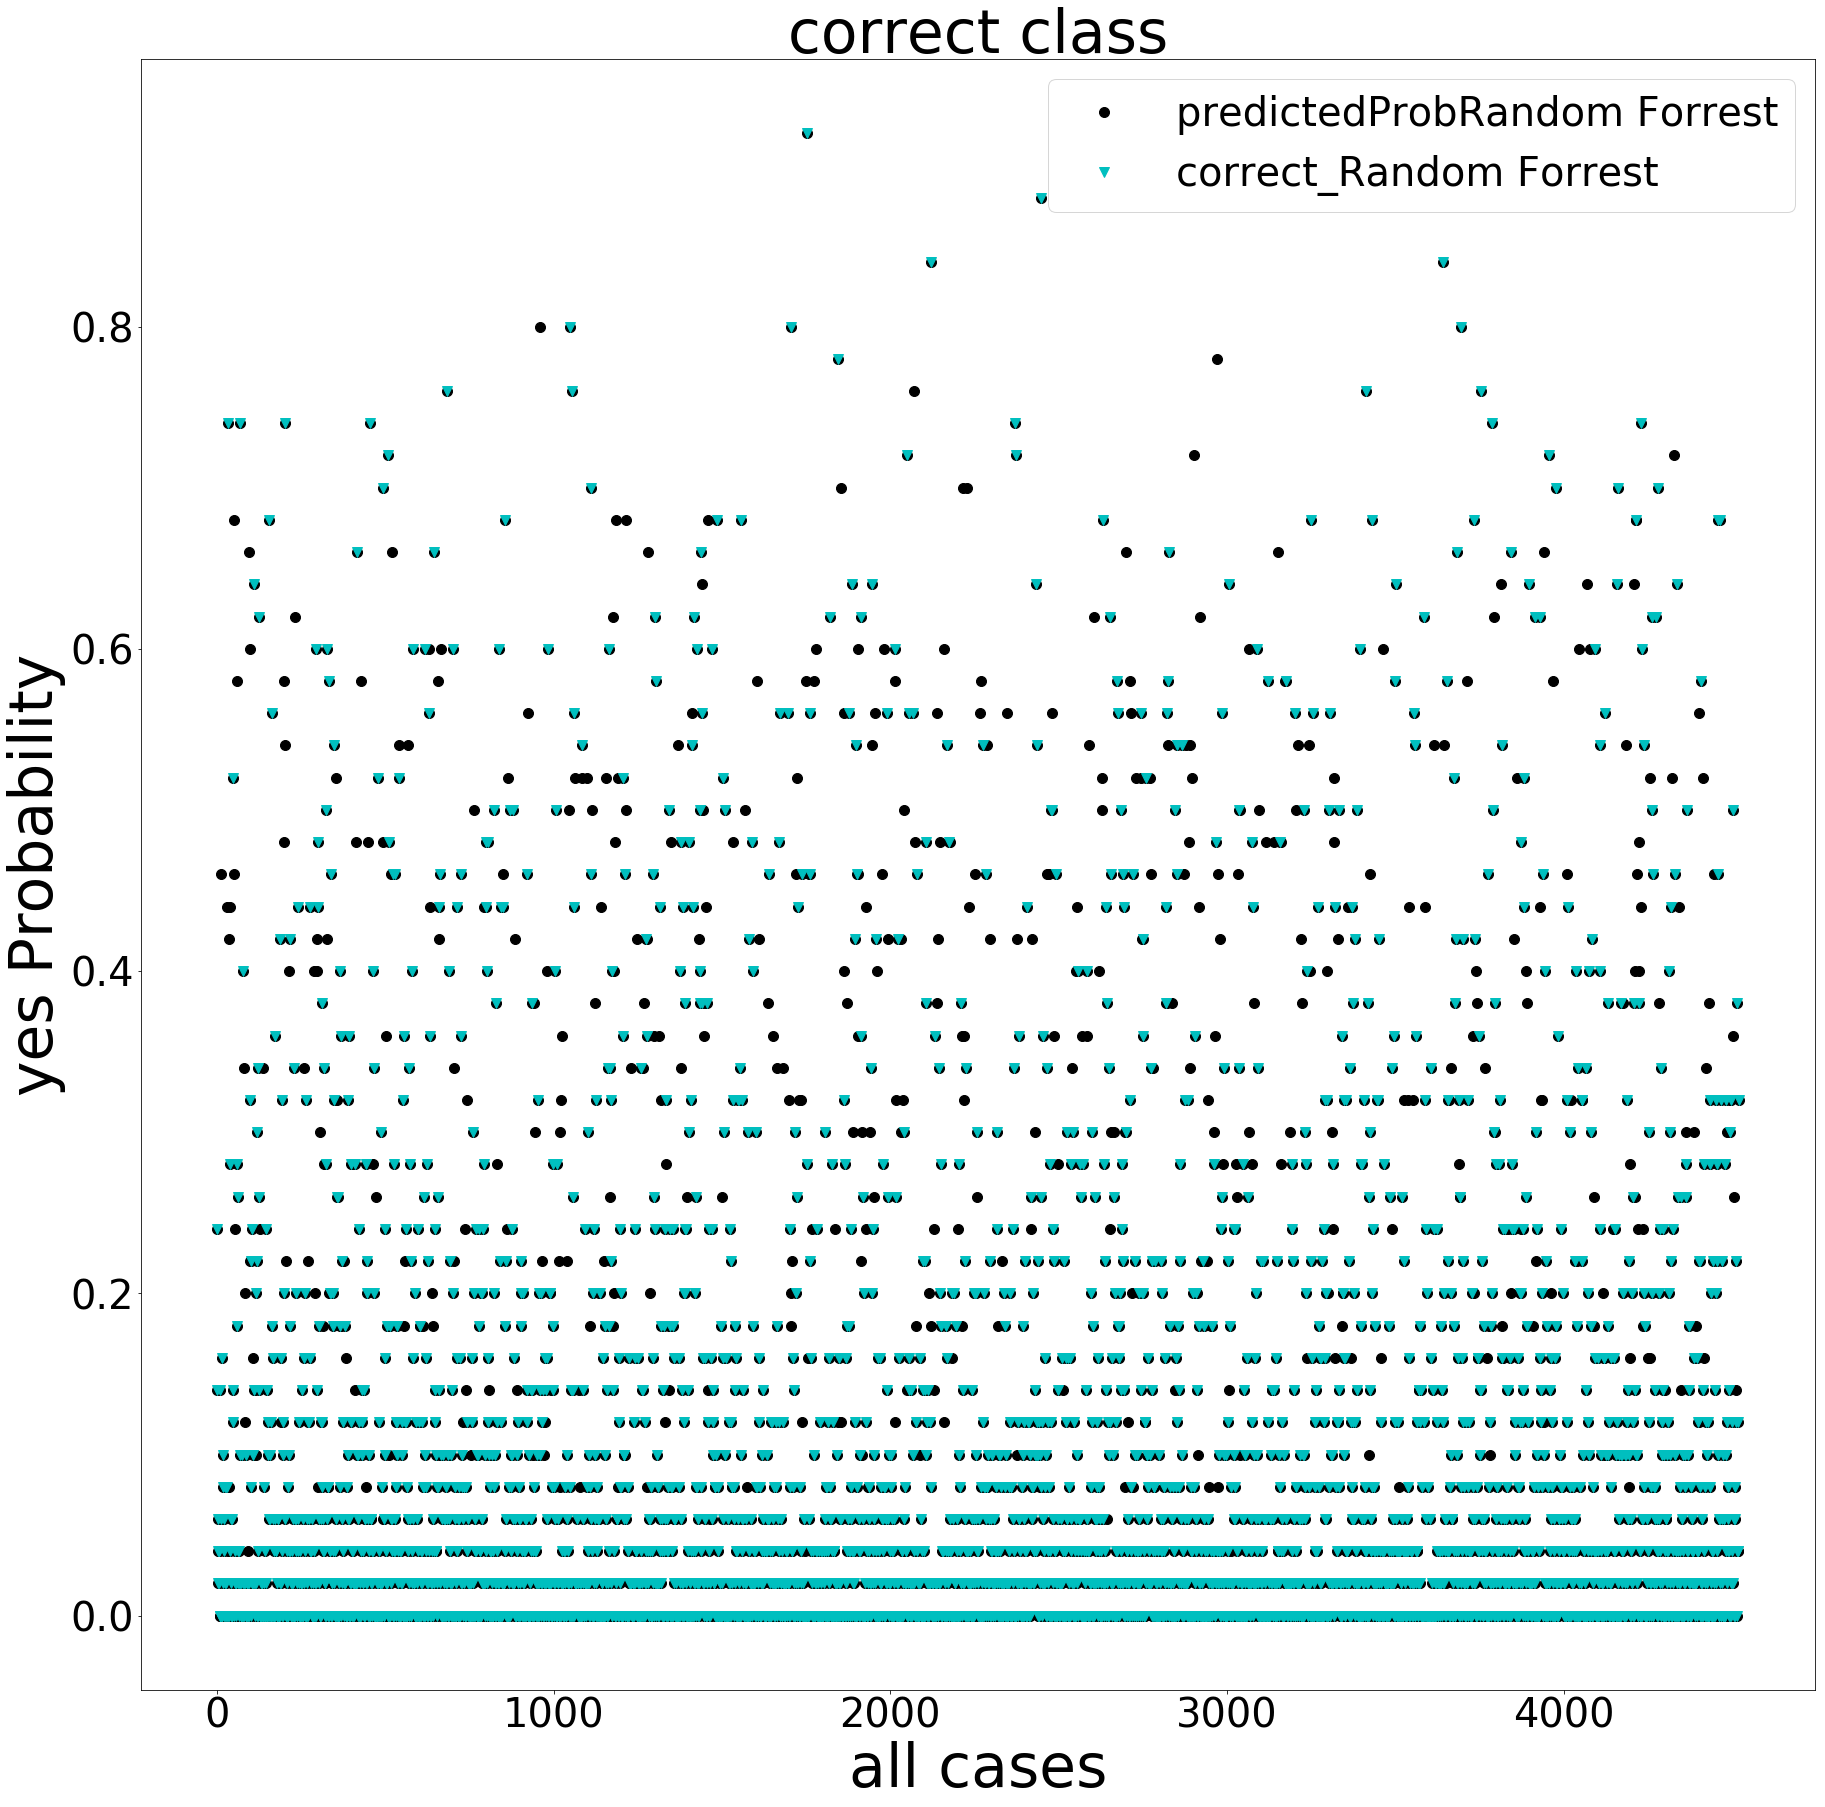

In [19]:
fig, ax = plt.subplots(figsize=(30, 30))
RF_prob,= ax.plot(probaRF1, 'ko', markersize=10)
RF_correct, = ax.plot(list(RF_correct_dict.keys()),list(RF_correct_dict.values()), 'cv', markersize=10)
ax.legend((RF_prob,RF_correct), ('predictedProbRandom Forrest', 'correct_Random Forrest'), fontsize=40)
ax.set_ylabel('yes Probability', fontsize=60)
ax.set_xlabel('all cases', fontsize=60)
ax.set_title('correct class', fontsize=60)
ax.tick_params(axis='both', which='major', labelsize=40)
plt.show()